# Glass Identification
This dataset contains 6 types of glass; defined in terms of their oxide content.

The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

Additional information: [Link](https://archive.ics.uci.edu/ml/datasets/glass+identification)

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

## Preprocessing

In [2]:
# print information about data
!cat ./Data/glass.names

1. Title: Glass Identification Database

2. Sources:
    (a) Creator: B. German
        -- Central Research Establishment
           Home Office Forensic Science Service
           Aldermaston, Reading, Berkshire RG7 4PN
    (b) Donor: Vina Spiehler, Ph.D., DABFT
               Diagnostic Products Corporation
               (213) 776-0180 (ext 3014)
    (c) Date: September, 1987

3. Past Usage:
    -- Rule Induction in Forensic Science
       -- Ian W. Evett and Ernest J. Spiehler
       -- Central Research Establishment
          Home Office Forensic Science Service
          Aldermaston, Reading, Berkshire RG7 4PN
       -- Unknown technical note number (sorry, not listed here)
       -- General Results: nearest neighbor held its own with respect to the
             rule-based system

4. Relevant Information:n
      Vina conducted a comparison test of her rule-based system, BEAGLE, the
      nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is 
      a product available 

In [3]:
!cat ./Data/glass.tag

An original file donated by Vina Speihler

ID, N    -- numeric identifier of the instance
RI, N    -- refractive index
NA2O, N  -- Sodium oxide
MGO, N   -- magnesium oxide
AL2O3, N -- aluminum oxide
SIO2, N  -- silcon oxide
K2O,  N  -- potassium oxide
CAO, N   -- calcium oxide
BAO, N   -- barium oxide
FE2O3, N -- iron oxide
TYPE, N  -- An unknown, but must correspond to the types in the paper
CAMG, N  -- Unsure

Types include:
  1. WF (Float Window)
  2. WNF (Non-float Window)
  3. C (Container)
  4. T (Tableware)
  5. H (Headlamp)     214    2568   14127 glass.dat
      19      92     518 glass.tag
      62     742    4775 glassx.dat
      51     610    3928 nonwindo.dat
       6      14     120 phones
     163    1955   12552 window.dat
     515    5981   36020 total


In [4]:
!head -n 5 ./Data/glass.data
# look at the data using shell command magic

1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1


As we see from data there is no header in the first line and the file is "csv", i.e. it is separted by "comma".
Thus wee need to add columns names in pd.read_csv() function.

The name of columns(features) exist in ./Data/glass.tag and also in ./Data/glass.tag

In [5]:
df = pd.read_csv(
                "./Data/glass.data",
                names=["ID","RI","NA2O","MGO","AL2O3","SIO2","K2O","CAO","BAO","FE2O3","TYPE"],
                index_col="ID"
                )
df.head()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
ID,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
# check that the information in ./Data/glass.names matches with the df we have constructed
# n_row = 214 and n_features = 10(without ID (index column))
n_rows = len(df)
assert (n_rows == 214)
n_cols = len(df.columns)
assert (n_cols == 10)

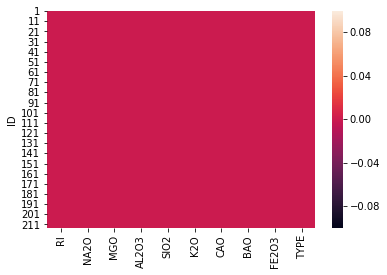

In [7]:
# look for existinse of missing values
sns.heatmap(df.isnull())

Thus, till now we have read data correctly and there is no missing value in the data.

## Exploratory analysis

We pairplot to see how data looks like

/home/javad/anaconda2/envs/myenv/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/javad/anaconda2/envs/myenv/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


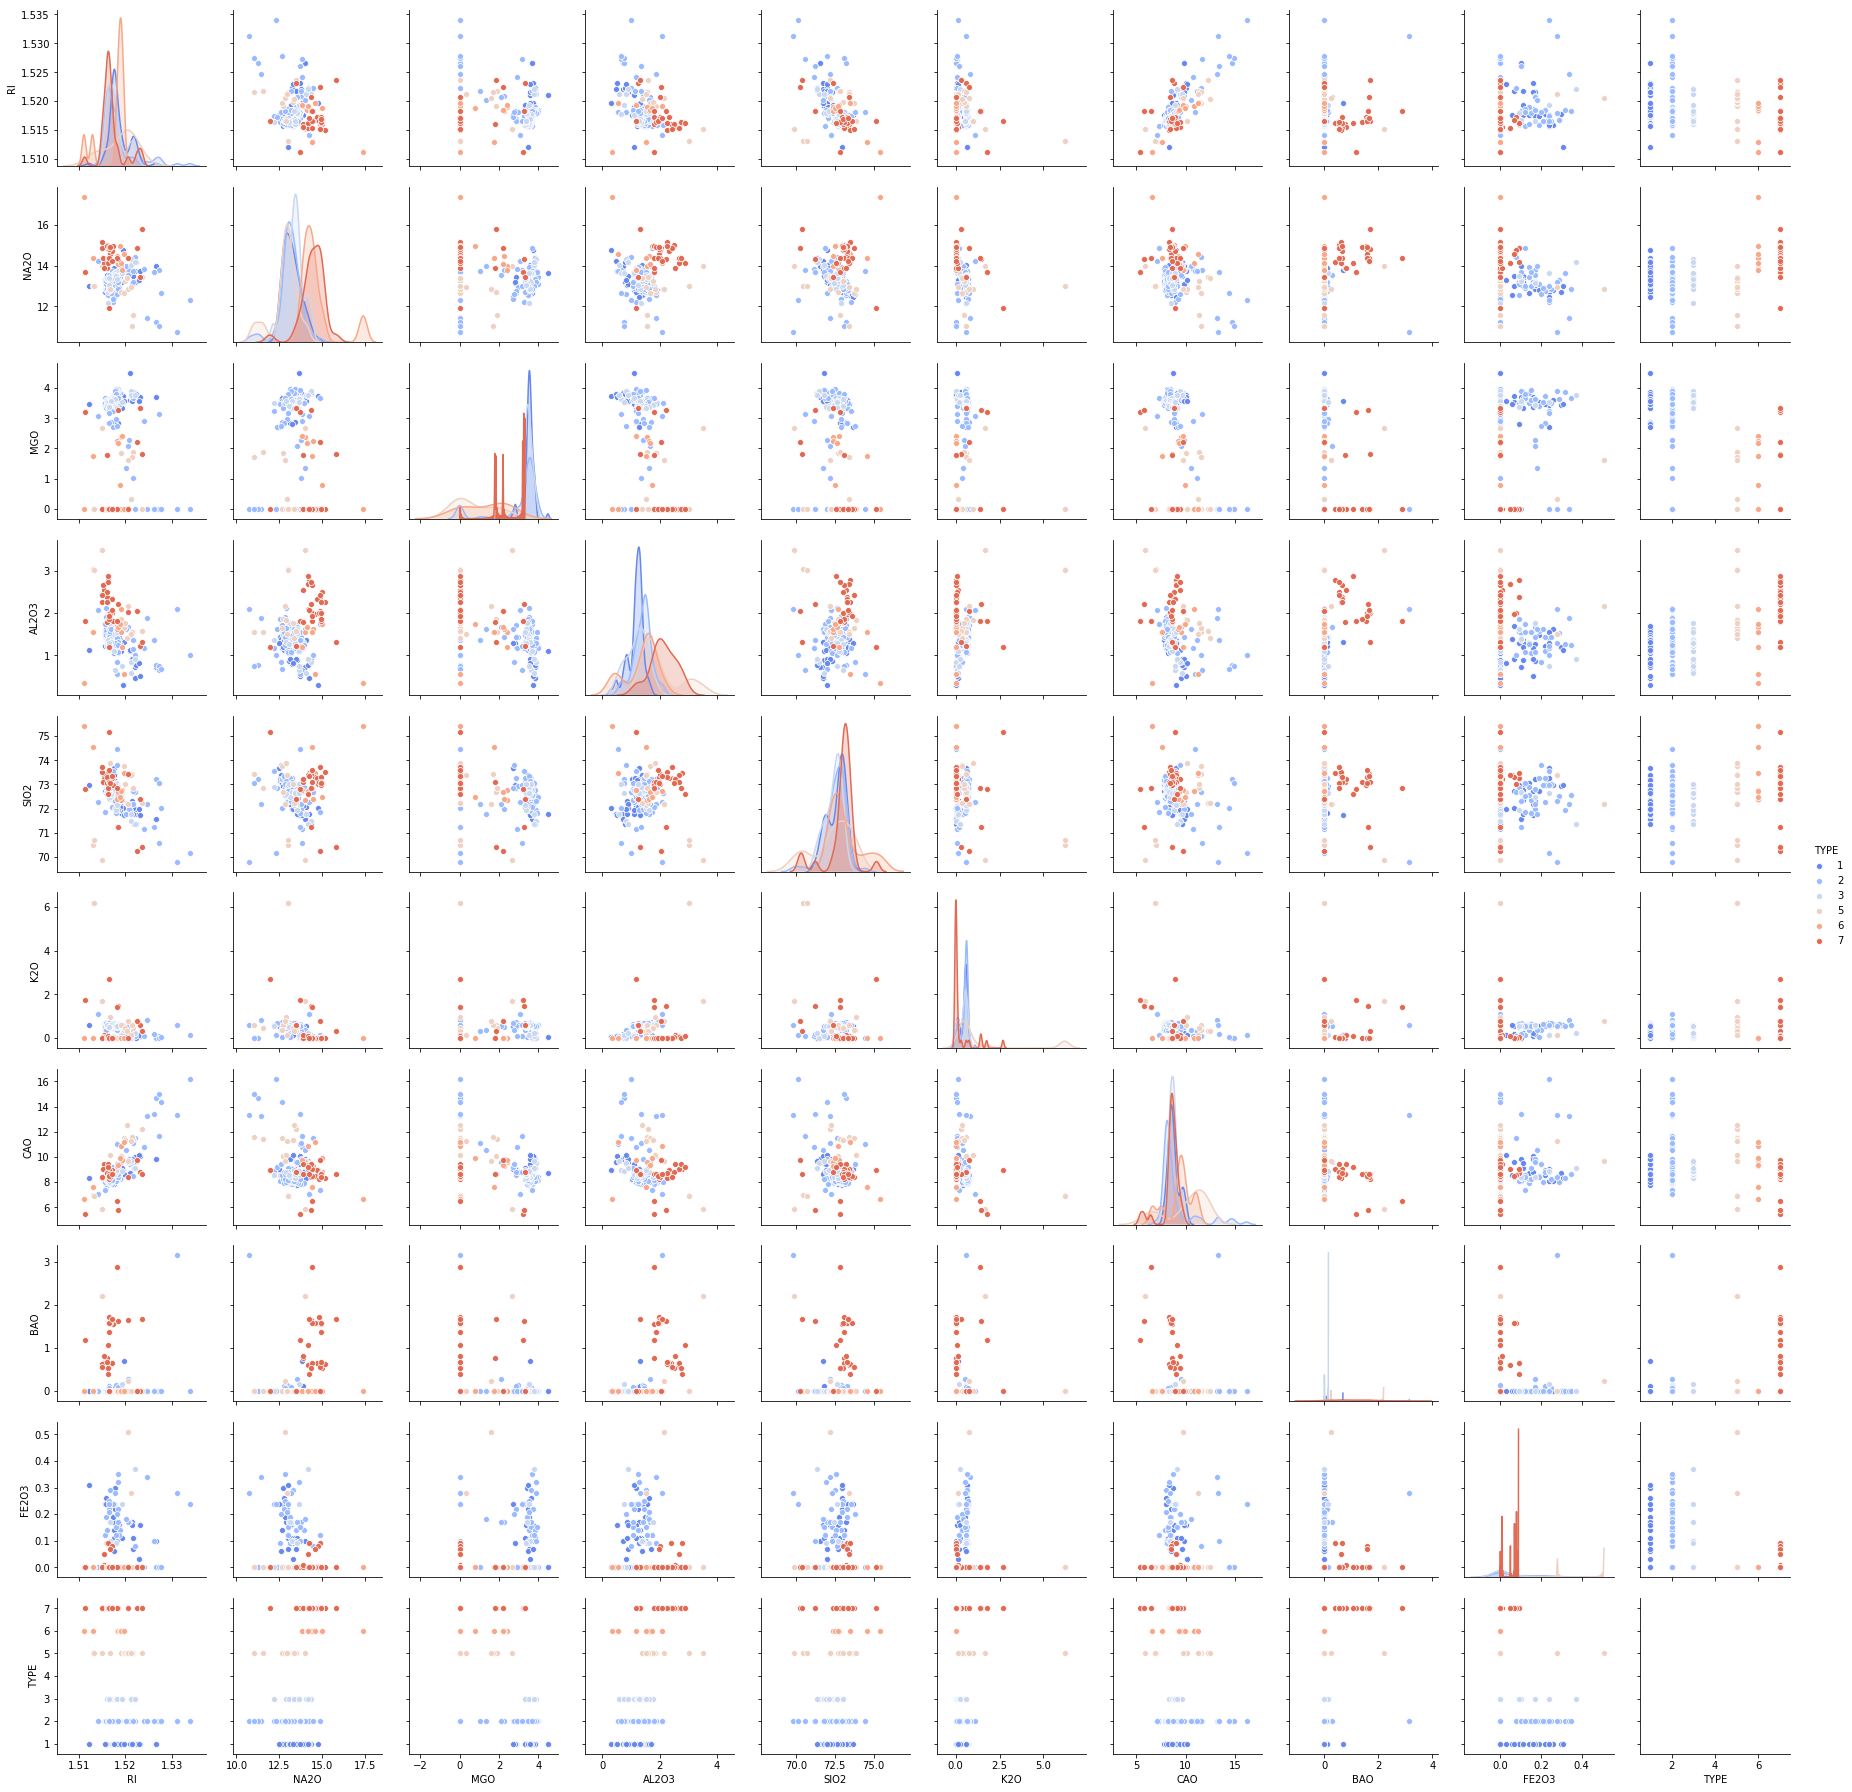

In [8]:
sns.pairplot(df, hue="TYPE", palette="coolwarm")

By looking at distirbution, we see that some kind of clusters exist. Thus it a good idea to give a KNN algorithm a shot.

## Preprocessing for Machine Learning algorithm

First we separate features from targets(lables) data

In [9]:
X = df.drop(labels=["TYPE"],axis=1)
print("head of features data:")
print(X.head(1))
y = df["TYPE"]

head of features data:
         RI   NA2O   MGO  AL2O3   SIO2   K2O   CAO  BAO  FE2O3
ID                                                            
1   1.52101  13.64  4.49    1.1  71.78  0.06  8.75  0.0    0.0


Now, we need to normalize the features data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.transform(X),columns=X.columns)
scaled_X.head()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


Divide dataset to train and test datasets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)
print("X_train.shape = "+str(X_train.shape))
print("X_test.shape =  "+str(X_test.shape))
print("y_train.shape = "+str(y_train.shape))
print("y_test.shape =  "+str(y_test.shape))

X_train.shape = (171, 9)
X_test.shape =  (43, 9)
y_train.shape = (171,)
y_test.shape =  (43,)


## Build a K-Nearest Neighbors Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# try KNN Mode with n_neighbors = 5 to see how it works
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.6976744186046512

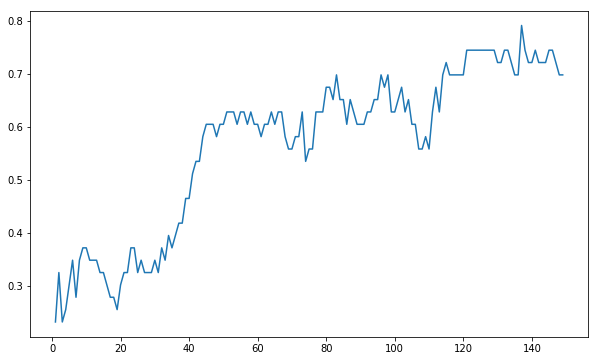

In [14]:
### Find an optimized number of neighbors
error_list=[]
for i in range(1,150):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_list.append(np.mean(y_pred != y_test))

#plot error to find n_neighbors correspond to minimum error
fig = plt.figure(figsize=(10,6))
plt.plot(range(1,150),error_list)

K=1,3, and 19 are points where the accuracy is high. However, in order to avoid ovefitting problem, we choose n_neighbors = 19

#### Build a final model 
A KNN with K = 19 is chosen.

In [15]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("accuracy: "+ str(accuracy_score(y_test,y_pred)))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred))
print("Classification Report:\n")
print(classification_report(y_test,y_pred))

accuracy: 0.7441860465116279
Confusion Matrix:

[[11  0  0  0  0  0]
 [ 2 12  0  0  0  0]
 [ 1  2  0  0  0  0]
 [ 0  3  0  1  0  0]
 [ 1  0  0  0  0  2]
 [ 0  0  0  0  0  8]]
Classification Report:

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.71      0.86      0.77        14
           3       0.00      0.00      0.00         3
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         3
           7       0.80      1.00      0.89         8

   micro avg       0.74      0.74      0.74        43
   macro avg       0.54      0.52      0.48        43
weighted avg       0.66      0.74      0.67        43



/home/javad/anaconda2/envs/myenv/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Plot Decision Boundaries for a KNN with 2 of features

For plotting decision boundaries we need to choose two of the features and train a knn model for that.

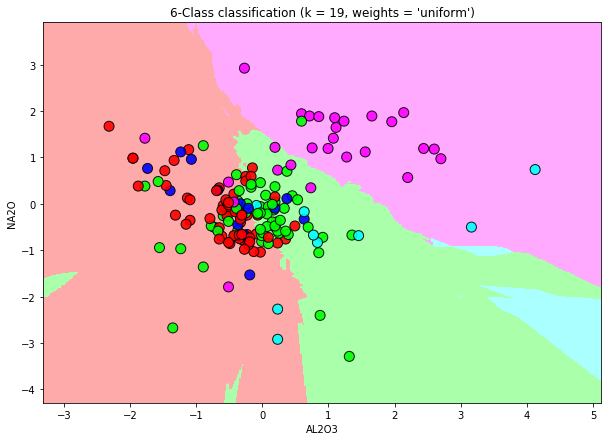

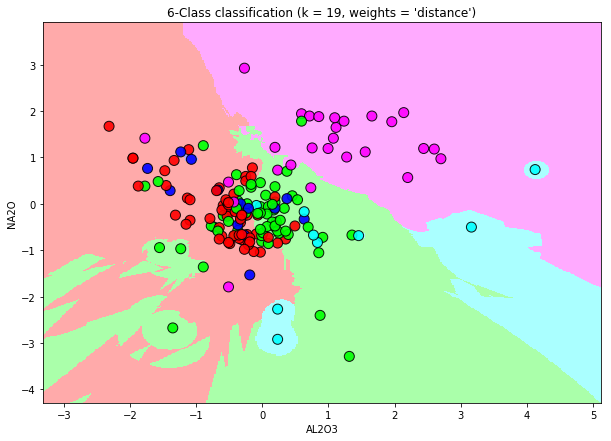

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 19



#chosse features
feature_0 = "AL2O3"
feature_1 = "NA2O"
X = X_train[[feature_0,feature_1]].values
y = y_train.values

h = .02  # step size in the mesh

fig1=0
fig2=0
fig={'uniform':fig1,'distance':fig2}

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FFFFAA', '#AAFFFF', '#FFAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00','#00FFFF','#FF00FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig[weights] = plt.figure(figsize=(10,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='#000000', s=100, alpha=0.9)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)
    plt.title("6-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
fig['uniform'].savefig("./boundary_decision_uniform.png")
plt.close(fig['uniform'])
fig['distance'].savefig("./boundary_decision_distance.png")
plt.close(fig['distance'])